# Análise Exploratória e ML dos Dados da Região 2 do Serviço Florestal dos EUA

    Trabalho da Disciplina de Machine Learning I
    
    Alunos: Gustavo da Costa Oliveira
            Vinícius Valim de Melo
            
    Data: 23/07/2019

Esta área de estudo inclui quatro áreas selvagens localizadas na Floresta Nacional de Roosevelt, no norte do Colorado. Essas áreas representam florestas com perturbações mínimas causadas pelo homem, de modo que os tipos de cobertura florestal existentes são mais um resultado de processos ecológicos do que de práticas de manejo florestal.

## Estrutura do dataset

Algumas informações básicas para essas quatro áreas de vida selvagem:
Neota (área 2) provavelmente tem o maior valor médio de elevação das quatro áreas de deserto.
Rawah (área 1) e Comanche Peak (área 3) teriam menor valor médio.
Cache la Poudre (área 4) teria o menor valor médio.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('data/dataset.csv')
#dataset = pd.read_csv('data/dataset_light.csv')

dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


### Relação das colunas do dataset

In [ ]:
columns = dataset.columns
columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### Tipos de dados

Elevation - Elevação em metros <br>
Aspect - Aspecto em graus azimute <br>
Slope - Inclinação em graus <br>
Horizontal_Distance_To_Hydrology -  Dist Horiz para água superf mais próxima em metros <br>
Vertical_Distance_To_Hydrology - Dist Vert para água superf mais próxima em metros <br>
Horizontal_Distance_To_Roadways - Dist Horiz para estrada mais próxima em metros <br>
Hillshade_9am -  Índice Hillshade às 9h, solstício de verão - 0 a 255 <br>
Hillshade_Noon - Índ Hillshade meio-dia, solstício de verão - 0 a 255 <br>
Hillshade_3pm - Índ Hillshade às 3pm, solstício de verão - 0 a 255 <br>
Horizontal_Distance_To_Fire_Points - Dist Horiz para os pontos de ignição mais próximos de incêndios florestais em metros <br>
Wilderness_Area (4 binary columns) - Área Selvagem - 0 (ausente) ou 1 (presente) <br>
Soil_Type (40 binary columns) - Tipos de Solo - 0 (ausente) ou 1 (presente) <br>
Cover_Type (7 types) - Tipos de Cobertura Florestal - 1 a 7 <br>
<br>
Wilderness Areas: <br>
1 -- Rawah <br>
2 -- Neota <br>
3 -- Comanche Peak <br>
4 -- Cache la Poudre <br>
<br>
Soil Types: <br>
1 to 40 : baseado no USFS Ecological <br>

In [ ]:
dataset.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

### Classes de Tipos de Floresta:		

1 - Spruce/Fir <br>
2 - Lodgepole Pine <br>
3 - Ponderosa Pine <br>
4 - Cottonwood/Willow <br>
5 - Aspen <br>
6 - Douglas-fir <br>
7 - Krummholz <br>

In [ ]:
Cover_Type = dataset['Cover_Type']
Cover_Type.value_counts()

2    283298
1    211839
3     35753
7     20510
6     17365
5      9491
4      2746
Name: Cover_Type, dtype: int64

### Total de registros do dataset

In [ ]:
Cover_Type.size

581002

### Histograma de distribuição dos Tipos de Cobertura Florestal

A ocorrência maior de tipos de cobertura florestal se distribui entre 1 - Spruce/Fir e 2 - Lodgepole Pine.

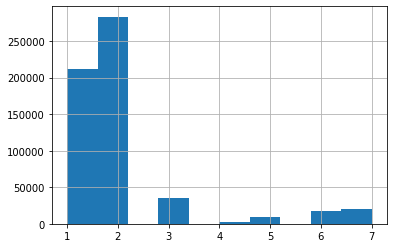

In [ ]:
Cover_Type.hist()

## Estatísticas do dataset

### Elevação em metros

In [ ]:
Elevation = dataset['Elevation']
Elevation.describe()

count    581002.000000
mean       2959.371136
std         279.980764
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64

### Aspecto em graus Azimute

Azimute é uma medida de direção horizontal, definida em graus. Em engenharia, azimute é muito utilizado na topografia, para medir distâncias, pontos etc. As medidas de azimute podem variar de 0° a 360° e as medidas são feitas em quadrantes, em sentido horário.

In [ ]:
Aspect = dataset['Aspect']
Aspect.describe()

count    581002.000000
mean        155.657158
std         111.913616
min           0.000000
25%          58.000000
50%         127.000000
75%         260.000000
max         360.000000
Name: Aspect, dtype: float64

### Inclinação em graus

In [ ]:
Slope = dataset['Slope']
Slope.describe()

count    581002.000000
mean         14.103702
std           7.488241
min           0.000000
25%           9.000000
50%          13.000000
75%          18.000000
max          66.000000
Name: Slope, dtype: float64

### Média de Elevação por Tipo de Cobertura Florestal

In [ ]:
dataset.groupby('Cover_Type')['Elevation'].agg('mean').head(7)

Cover_Type
1    3128.644428
2    2920.937303
3    2394.513691
4    2223.931537
5    2787.447266
6    2419.185891
7    3361.928669
Name: Elevation, dtype: float64

## Matriz de correlação (mapa de calor)

Correlação requer dados contínuos. Portanto, os atributos Wilderness_Area e Soil_Type foram ignorados uma vez que são valores binários.

A maior correlação positiva ocorre entre os atributos Hillshade_3pm e Aspect.
A maior correlação negativa ocorre entre Hillshade_9am e Hillshade_3pm. 

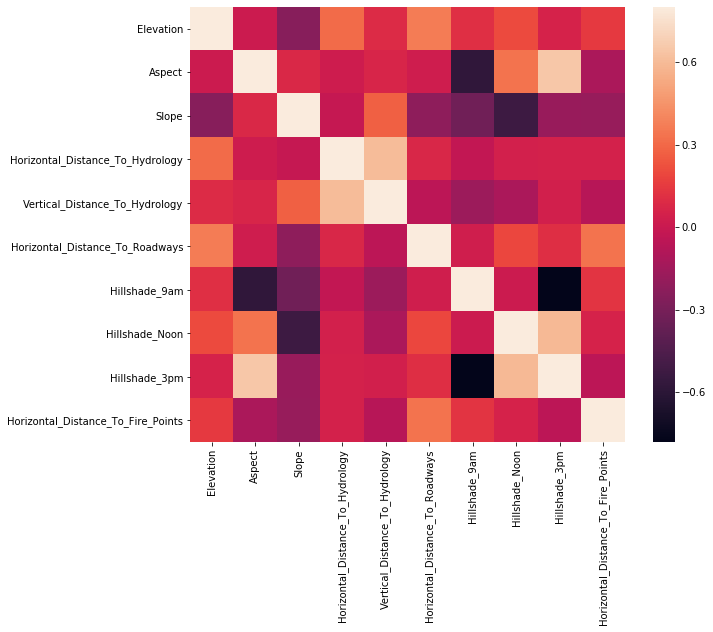

In [ ]:
size = 10
corrmat = dataset.iloc[:,:size].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True);

In [ ]:
data = dataset.iloc[:,:size]

# Nomes das colunas
cols = data.columns

# Calcule os coeficientes de correlação de Pearson para todas as combinações
data_corr = data.corr()

# Limiar (somente os altamente correlacionados importam)
threshold = 0.5
corr_list = []

data_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015719,-0.242700,0.306218,0.093299,0.365553,0.112198,0.205883,0.059130,0.148018
Aspect,0.015719,1.000000,0.078726,0.017369,0.070304,0.025110,-0.579274,0.336109,0.646950,-0.109186
Slope,-0.242700,0.078726,1.000000,-0.010603,0.274977,-0.215921,-0.327210,-0.526910,-0.175845,-0.185658
Horizontal_Distance_To_Hydrology,0.306218,0.017369,-0.010603,1.000000,0.606237,0.072025,-0.027081,0.046787,0.052321,0.051872
Vertical_Distance_To_Hydrology,0.093299,0.070304,0.274977,0.606237,1.000000,-0.046377,-0.166330,-0.110958,0.034898,-0.069914
Horizontal_Distance_To_Roadways,0.365553,0.025110,-0.215921,0.072025,-0.046377,1.000000,0.034359,0.189463,0.106113,0.331584
Hillshade_9am,0.112198,-0.579274,-0.327210,-0.027081,-0.166330,0.034359,1.000000,0.010039,-0.780294,0.132683
Hillshade_Noon,0.205883,0.336109,-0.526910,0.046787,-0.110958,0.189463,0.010039,1.000000,0.594274,0.057326
Hillshade_3pm,0.059130,0.646950,-0.175845,0.052321,0.034898,0.106113,-0.780294,0.594274,1.000000,-0.047995
Horizontal_Distance_To_Fire_Points,0.148018,-0.109186,-0.185658,0.051872,-0.069914,0.331584,0.132683,0.057326,-0.047995,1.000000


In [ ]:
# Classificando os valores altamente correlacionados
for i in range(0, size):
    for j in range(i+1, size):
        if data_corr.iloc[i,j]>= threshold and data_corr.iloc[i,j]<1\
        or data_corr.iloc[i,j] <0 and data_corr.iloc[i,j]<=-threshold:
            corr_list.append([data_corr.iloc[i,j],i,j])

In [ ]:
# Sorteando os valores
s_corr_list = sorted(corr_list,key= lambda x: -abs(x[0]))

# Exibindo os valores mais altos
for v,i,j in s_corr_list:
    print("%s and %s = %.2f" % (cols[i], cols[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53
Slope and Hillshade_Noon = -0.53


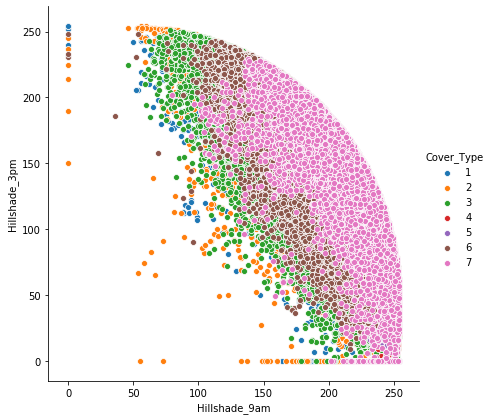

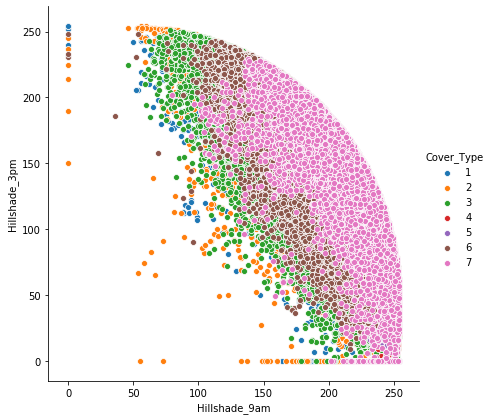

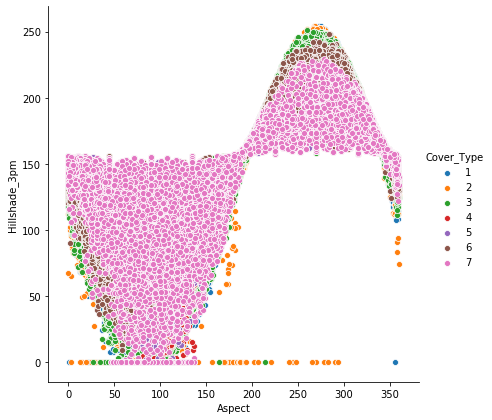

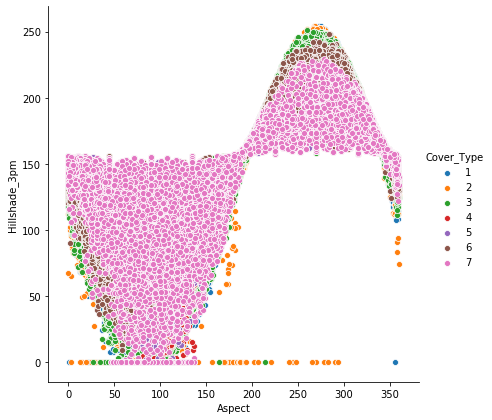

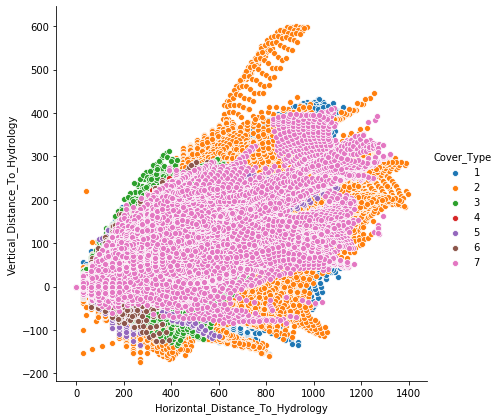

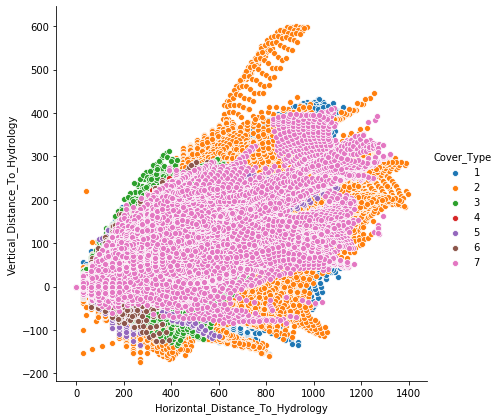

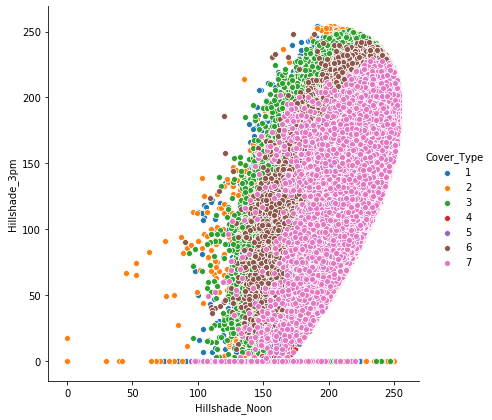

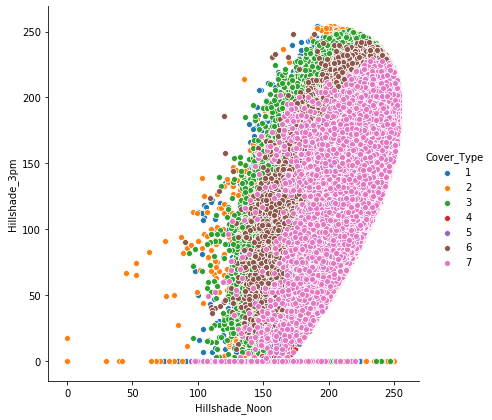

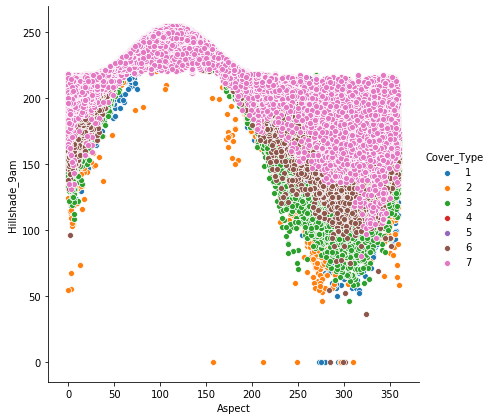

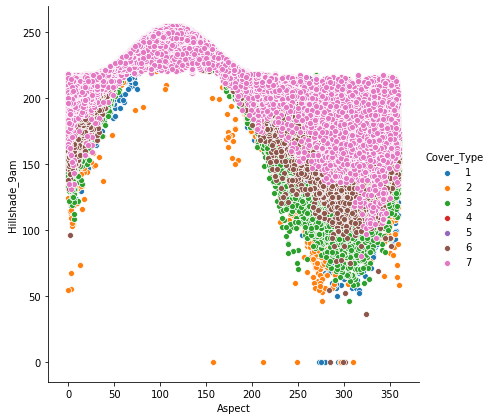

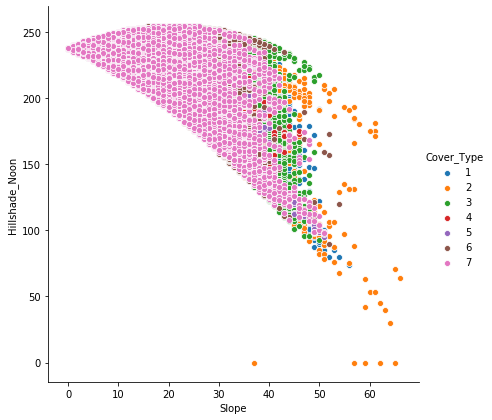

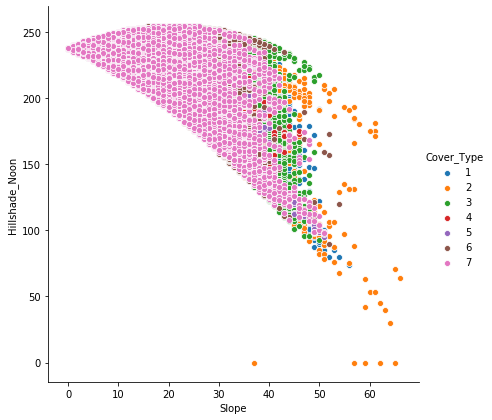

In [ ]:
# Pair wise scatter plot with hue being 'Cover_Type'
for v,i,j in s_corr_list:
    sns.pairplot(data = dataset, hue='Cover_Type', size= 6, x_vars=cols[i], y_vars=cols[j])
    plt.show()

# Treinamento e testes dos modelos

## Preparação do dataset - Treino e Teste

In [ ]:
# cria um dataset para treinamento
y = dataset["Cover_Type"].values
X = dataset.drop(columns=["Cover_Type"])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

# test_size: percentual de instâncias utilizadas para teste
# random_state: é uma constante para geração dos conjuntos
# stratify: utilizo uma amostra estratificada dos dados para gerar o conjunto de teste (vou ter a mesma proporção de cada classe no conjunto de teste)
X_train.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
105726,2732,2,22,67,22,3140,184,193,141,1739,...,0,0,0,0,0,0,0,0,0,0


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# instancio um classificador KNN
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
# n_neighbors: numero de k
# metric: medida de distância utilizada. Default é "minkowski".

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [ ]:
# Acuracia: medida mais utilizada para validar o desempenho de algoritmos em tarefas de classificação
knn.score(X_test, y_test)

# obtida pelo total de acertos no X_test / total de instancias do X_test

0.9582800903348963

### Tunando parâmetros usando GridSearchCV e KNN

In [ ]:
#testando um range de 1 a 10 vizinhos
from sklearn.model_selection import GridSearchCV
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 11)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=10, n_jobs=-1)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
#verificando o parâmetro ideal para n_neighbors
knn_gscv.best_params_

{'n_neighbors': 3}

In [ ]:
#média de score para o parâmetro ideal de n_neighbors
knn_gscv.best_score_

0.9644463625597591

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, random_state=None, shuffle=True)

#train model with cv of 10
#n_jobs = -1 significa que o cálculo vai ser enviada em todas as CPUs do computador
#shuffle = True/False se deve embaralhar os dados antes de dividir em lotes
#random_state = Se a instância RandomState, random_state é o gerador de números aleatórios;

#melhor parametro (knn_gscv.best_params_)
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

knn_cv = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy', n_jobs=-1)
#print each cv score (accuracy) and average them
print(knn_cv)
print('knn_cv mean:{}'.format(np.mean(knn_cv)))

[0.97062013 0.97127416 0.97110155 0.96977625 0.97060241 0.96982788
 0.97082616 0.97104991 0.97065404 0.97139415]
knn_cv mean:0.9707126645537218


## Naive Bayes

In [ ]:
# Codigo utilizando a biblioteca SK Learn
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

predicted = nb.predict(X_test)

print("Acurácia: {0}".format(metrics.accuracy_score(y_test, predicted)))

Acurácia: 0.4584339517344613


### Tunando parâmetros usando GridSearchCV e Naive Bayes

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn import svm, datasets

skf = StratifiedKFold(n_splits=10)
param_grid = {'var_smoothing' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

nb_gscv = GridSearchCV(nb, param_grid, cv=skf, return_train_score=True, scoring='accuracy', n_jobs=-1)
nb_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'var_smoothing': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [ ]:
nb_gscv.best_params_

{'var_smoothing': 1e-07}

In [ ]:
nb_gscv.best_score_

0.6473099717163622

### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

kfold = model_selection.KFold(n_splits=10, random_state=7)

#melhor parametro - (nb_gscv.best_params_)
nb = GaussianNB(priors=None, var_smoothing=1e-07)

#calling the cross validation function
nb_cv = model_selection.cross_val_score(nb, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', nb_cv.mean(), nb_cv.std())

print(msg)

NB accuracy: 0.647295 (0.003514)


## Árvores de Decisão

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Cria um classificador
dtree = DecisionTreeClassifier()

# Treinamento do modelo com os dados de treinamento
dtree.fit(X_train, y_train)

# Testa o modelo no dataset de teste
y_predicted = dtree.predict(X_test)

# Calcula a acurácia do model
print("Acuracia sem CV:", metrics.accuracy_score(y_test, y_predicted))

Acuracia sem CV: 0.9344915532699459


### Tunando parâmetros usando GridSearchCV e DecisionTree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4,
                               min_samples_split=10,
                               max_leaf_nodes=10)

param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

dtree_gs = GridSearchCV(dtree, param_grid, cv=10, n_jobs=-1)

dtree_gs.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
print("Best Hyperparameters::\n{}".format(dtree_gs.best_params_))
print("Acuracia::{}".format(dtree_gs.best_score_))

Best Hyperparameters::
{'criterion': 'entropy', 'max_depth': 4}
Acuracia::0.6383747388132915


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
dtree_cv = DecisionTreeClassifier()
dtree_cv = DecisionTreeClassifier(max_depth=4,
                                  criterion='entropy')

# ATENCAO: não uso a funcao "train_test_split" no CV, e sim passo o dataset inteiro (X) + classe (y)
dtree_cv.fit(X,y)

scores = cross_val_score(dtree_cv, X, y, cv=10, n_jobs=-1)
scores

array([0.66048225, 0.73214347, 0.73326219, 0.69728576, 0.50085196,
       0.66526678, 0.59689496, 0.6401315 , 0.50258184, 0.5807873 ])

In [ ]:
# Calcula a acurácia do modelo com CV
print("Acuracia com CV:",scores.mean())

Acuracia com CV: 0.6309688023343496


## Predição das instâncias do arquivo “to_predict.csv”

Observamos que o algoritmo KNN obteve o melhor resultado sem CV, provavelmente por um viés na divisão dos datasets em treino e teste, fato que é corrigido usando o Cross Validation. Dentre os algoritmos CV o que obteve a melhor acurácia foi o ...

In [ ]:
dataset_test = pd.read_csv('data/to_predict.csv')
dataset_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2788,355,17,150,49,3270,190,207,153,6033,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,3226,354,12,525,14,2279,200,218,156,1215,...,0,0,0,0,0,0,0,1,0,0
3,2529,34,14,240,101,679,217,208,123,366,...,0,0,0,0,0,0,0,0,0,0
4,2703,77,9,216,19,297,232,224,125,1068,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
preds = knn_gscv.predict(dataset_test)
print(preds)

[2 5 2 2 2 2 2 3 4 4]


## Gravando “model.joblib” do modelo com o melhor 

In [ ]:
#persistindo o melhor modelo
from joblib import dump, load
dump(knn_gscv, 'knn_gscv.joblib')

['knn_gscv.joblib']